In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
dset_rain = xr.open_dataset('data/twp1440cpol.rainfall.c1.20170304.nc')
dset_class = xr.open_dataset('data/twp1440cpol.steinerclass.c1.20170304.nc')

In [4]:
rain = dset_rain.radar_estimated_rain_rate.values
stein = dset_class.steiner_echo_classification.values

In [5]:
th = np.linspace(0, 6.28)
class IndexTracker(object):
    def __init__(self, fig, ax, X, X1):
        self.ax = ax
#         ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.X1 = X1
        self.slices, rows, cols = X.shape
        self.ind = 0        
        self.im0 = ax[0].imshow(self.X[self.ind, :, :], 
                                origin='ij', 
                                extent=[-150, 150, -150, 150], 
                                vmin=0, vmax=50, 
                                cmap='YlOrRd')
        self.im1 = ax[1].imshow(self.X1[self.ind, :, :], 
                                origin='ij', 
                                extent=[-150, 150, -150, 150], 
                                vmin=0, vmax=2, 
                                cmap='viridis')
        
        fig.colorbar(self.im0, ax=self.ax[0], orientation='horizontal', label='Rainfall rate (mm/h)')
        cbar = fig.colorbar(self.im1, ax=self.ax[1], orientation='horizontal', label='Steiner Classification')
        cbar.set_ticks([0, 1, 2])
        cbar.ax.set_xticklabels(['No cloud', 'Stratiform', 'Convective'], rotation=45)
        for a in ax:
            [a.plot(r * np.cos(th), r*np.sin(th), 'k', linewidth=1, alpha=0.75) for r in [50, 100, 147.5]]
            a.axis('off')
        
        self.ax[0].set_title(f'Darwin - 4 March 2017')

        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im0.set_data(self.X[self.ind, :, :])
        self.im1.set_data(self.X1[self.ind, :, :])
        self.ax[1].set_title(f'Slice at {self.ind // 6:02}:{10*(self.ind % 6):02} UTC')
        self.im0.axes.figure.canvas.draw()
        self.im1.axes.figure.canvas.draw()

<IPython.core.display.Javascript object>


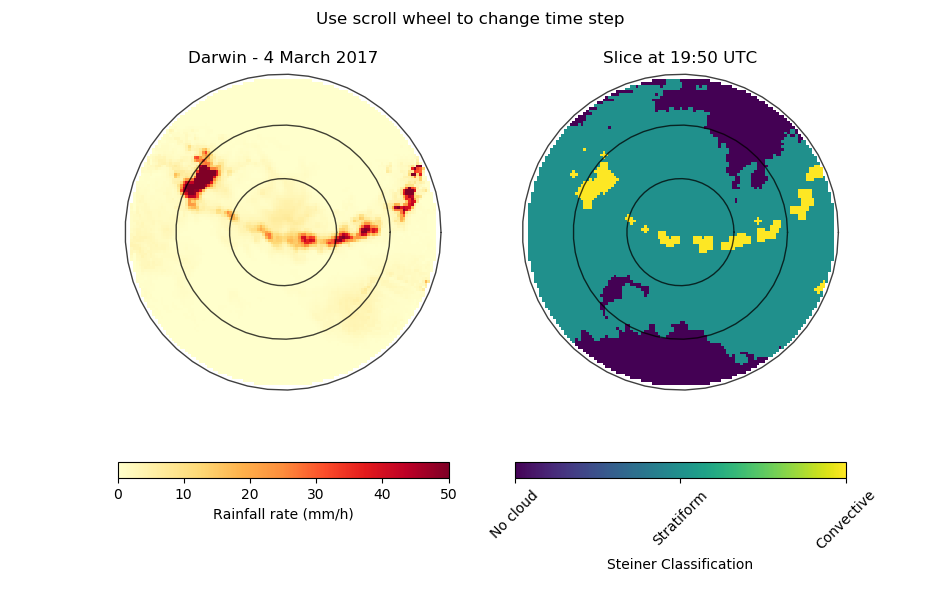

In [6]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
tracker = IndexTracker(fig, ax, rain, stein)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
fig.suptitle('Use scroll wheel to change time step')
plt.show()